
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# Load PEPACS module
from pepacs.agents.pepacs import PEPACS, Configuration

from pepacs.agents.pepacs.utils.Plotting_wrapper import \
    parse_metrics_to_df, \
    plot_performance

from pepacs.metrics import \
    _maze_metrics, \
    _how_many_peps_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _enhanced_effect_error

# Load environments
import gym
import my_mazes

# Agent - PEPACS

## Common parameters

In [2]:
CLASSIFIER_LENGTH = 8
NUMBER_OF_POSSIBLE_ACTIONS = 8

MAZE = "Woods100-v0"

NUMBER_OF_EXPLORE_TRIALS = 500
METRICS_TRIAL_FREQUENCY_EXPLORE = 100
BETA_ALP = 0.05
BETA_RL = 0.05
BETA_PEP = 0.01
EPSILON = 0.8

DO_GA = True
ENABLE_PEP = True

SLIPPERY_PROB = 0.25

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_NO_RL = 500
BETA_EXPLOIT_NO_RL = 0.00
NUMBER_OF_EXPLOIT_TRIALS_RL_START = 500
BETA_EXPLOIT_RL_START = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL = 500
BETA_EXPLOIT_RL = 0.05

#RL Set Up
GAMMA = 0.95

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Set up probability to do a random action
maze.env.set_prob_slippery(SLIPPERY_PROB)
# Reset it, by putting an agent into random position
maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ A $ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of PEPACS - Exploration

In [4]:
%%time

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    do_ga=DO_GA,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    beta_pep=BETA_PEP,
    gamma=0.95,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=100,
    theta_as=20,
    mu=0.3,
    chi=0.8
)

agent_explore = PEPACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 7.92 s, sys: 6.19 ms, total: 7.92 s
Wall time: 7.92 s


### Performance

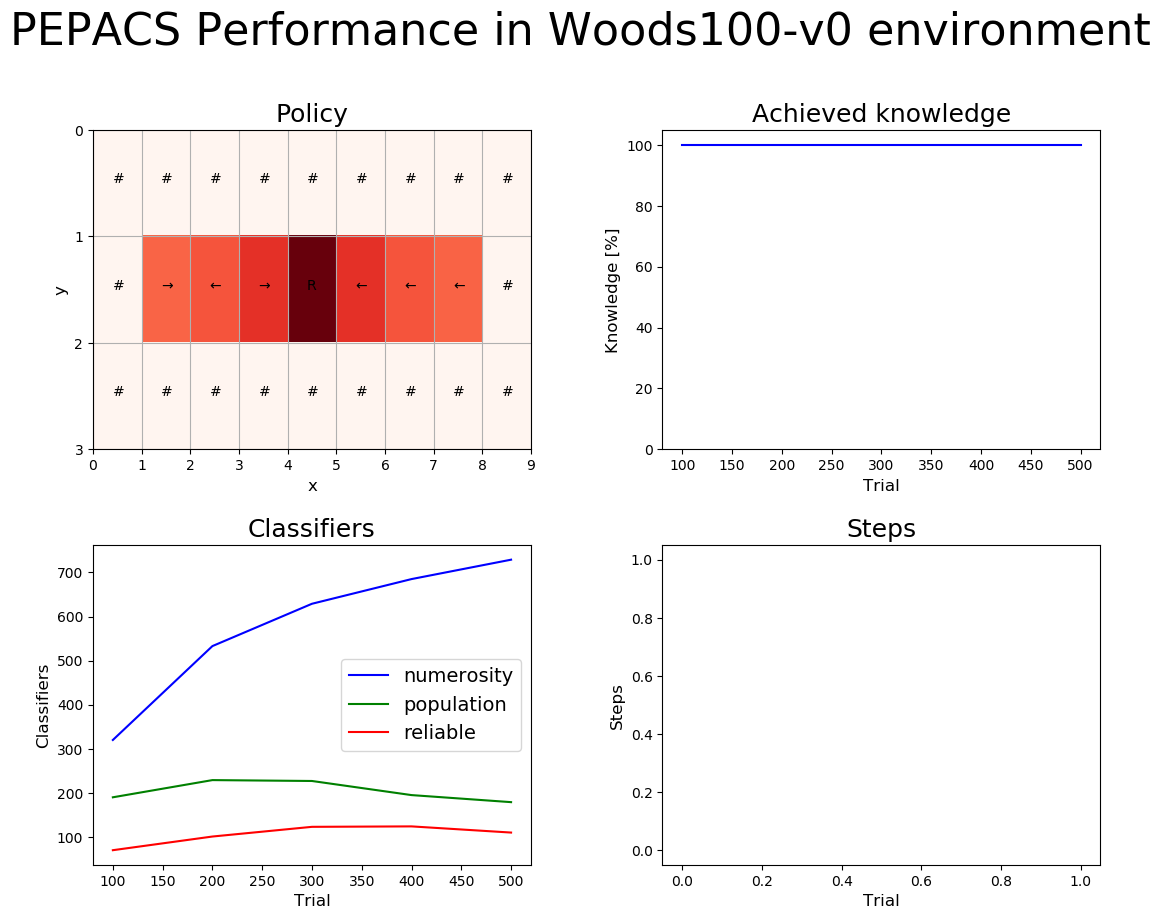

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
print(_maze_metrics(population_explore, maze))

first_trial, stable_trial, last_trial = _when_full_knowledge_is_achieved(metrics_explore)

print("Full knowledge was achieved at trials ", first_trial, " and was stable at ", stable_trial)

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.")

print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))

{'knowledge': 100.0, 'population': 179, 'numerosity': 729, 'reliable': 110}
Full knowledge was achieved at trials  100  and was stable at  100
There are  44  enhanced classifer(s) that match a non-aliased states.
Mean reliable population specifity is  0.20795454545454545


In [7]:
population_explore.sort(key=lambda cl: -cl.exp)
population_explore_to_display = [(cl.condition, cl.action, cl.effect, cl.exp) for cl in population_explore
    if cl.is_reliable() and cl.is_enhanced()]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

(##0###0#, 2, ##{1:43.13%, 9:35.02%, 0:21.85%}#####, 633)


(##0###0#, 2, ##{1:42.61%, 9:34.42%, 0:22.97%}###{0:83.65%, 1:16.35%}#, 554)


(##0###0#, 6, ######{1:51.49%, 9:48.51%}#, 543)


(##0###0#, 6, ######{1:39.75%, 9:37.04%, 0:23.21%}#, 540)


(##0###0#, 6, ##{0:82.82%, 9:17.18%}###{1:39.15%, 9:36.44%, 0:24.41%}#, 493)


(##1###0#, 6, ##{0:67.20%, 1:32.80%}#####, 428)


(##0###1#, 2, ######{0:66.43%, 1:33.57%}#, 394)


(##0###0#, 3, ######{0:78.42%, 9:21.58%}#, 334)


(##0###0#, 0, ######{0:77.56%, 1:22.44%}#, 327)


(##0###0#, 0, ##{0:77.35%, 9:22.65%}#####, 282)


(##0###0#, 0, ##{0:77.72%, 9:22.28%}###{0:80.86%, 1:19.14%}#, 282)


(##9#####, 2, ##{0:69.21%, 9:30.79%}#####, 264)


(##0###9#, 6, ######{0:67.00%, 9:33.00%}#, 257)


(##0###0#, 1, ######{0:71.67%, 9:14.40%, 1:13.93%}#, 241)


(##0###0#, 1, ######{0:75.68%, 9:24.32%}#, 241)


(##0###0#, 5, ######{0:74.96%, 1:25.04%}#, 223)


(##0###0#, 5, ##{0:74.79%, 9:25.21%}###{0:75.24%, 1:24.76%}#, 223)


(##0###0#, 4, ######{0:7

In [8]:
maze.env.get_theoritical_probabilities()

{'11011111': {2: {'reachable_states': ['11011101'],
   'probabilities': {0: {1: 1.0},
    1: {1: 1.0},
    2: {0: 1.0},
    3: {1: 1.0},
    4: {1: 1.0},
    5: {1: 1.0},
    6: {0: 0.78125, 1: 0.21875},
    7: {1: 1.0}}},
  0: {'reachable_states': ['11011111'],
   'probabilities': {0: {1: 1.0},
    1: {1: 1.0},
    2: {0: 1.0},
    3: {1: 1.0},
    4: {1: 1.0},
    5: {1: 1.0},
    6: {1: 0.96875, 0: 0.03125},
    7: {1: 1.0}}},
  1: {'reachable_states': ['11011111'],
   'probabilities': {0: {1: 1.0},
    1: {1: 1.0},
    2: {0: 1.0},
    3: {1: 1.0},
    4: {1: 1.0},
    5: {1: 1.0},
    6: {1: 0.96875, 0: 0.03125},
    7: {1: 1.0}}},
  3: {'reachable_states': ['11011111'],
   'probabilities': {0: {1: 1.0},
    1: {1: 1.0},
    2: {0: 1.0},
    3: {1: 1.0},
    4: {1: 1.0},
    5: {1: 1.0},
    6: {1: 0.96875, 0: 0.03125},
    7: {1: 1.0}}},
  4: {'reachable_states': ['11011111'],
   'probabilities': {0: {1: 1.0},
    1: {1: 1.0},
    2: {0: 1.0},
    3: {1: 1.0},
    4: {1: 1.0},
  

In [9]:
%%time

cfg_exploit_no_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    do_pep=ENABLE_PEP,
    do_ga=False,
    beta_alp=BETA_ALP,
    beta_rl=BETA_EXPLOIT_NO_RL,
    beta_pep=BETA_PEP,
    gamma=GAMMA,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=0.0,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=100,
    theta_as=20,
    mu=0.3,
    chi=0.8
)

agent_exploit_no_rl = PEPACS(cfg_exploit_no_rl, population_explore)
population_exploit_no_rl, metrics_exploit_no_rl = agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 4.76 s, sys: 4.24 ms, total: 4.77 s
Wall time: 4.77 s


In [10]:
%%time

cfg_exploit_rl_start = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    do_pep=ENABLE_PEP,
    do_ga=False,
    beta_alp=BETA_ALP,
    beta_rl=BETA_EXPLOIT_RL_START,
    beta_pep=BETA_PEP,
    gamma=GAMMA,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=0.0,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=100,
    theta_as=20,
    mu=0.3,
    chi=0.8
)

agent_exploit_rl_start = PEPACS(cfg_exploit_rl_start, population_exploit_no_rl)
population_exploit_rl_start, metrics_exploit_rl_start = agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 2.81 s, sys: 2.37 ms, total: 2.81 s
Wall time: 2.81 s


In [11]:
%%time

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    do_pep=ENABLE_PEP,
    do_ga=False,
    beta_alp=BETA_ALP,
    beta_rl=BETA_EXPLOIT_RL,
    beta_pep=BETA_PEP,
    gamma=GAMMA,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=0.0,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=10,
    theta_as=20,
    mu=0.3,
    chi=0.8
)

agent_exploit_rl = PEPACS(cfg_exploit_rl, population_exploit_rl_start)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 3.39 s, sys: 163 µs, total: 3.39 s
Wall time: 3.39 s


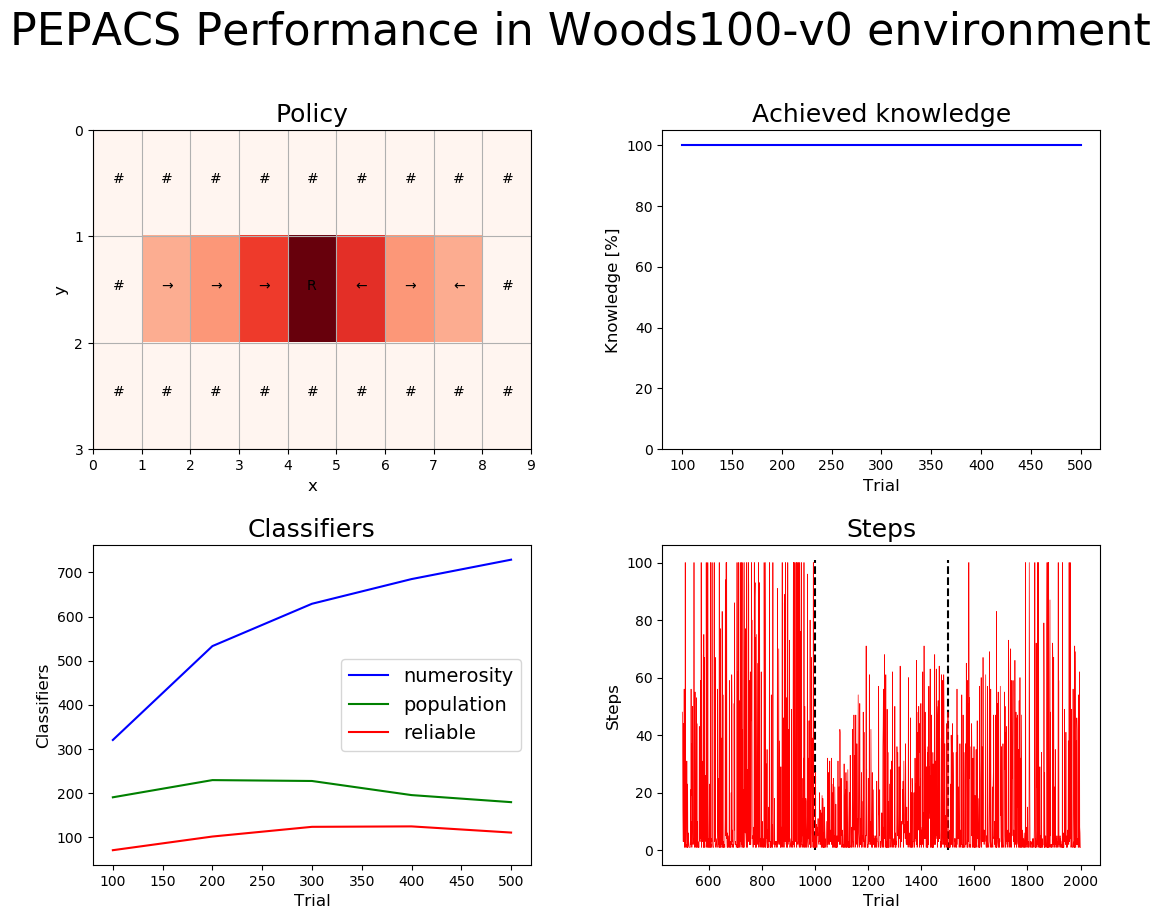

In [12]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_exploit = metrics_exploit_no_rl.copy()
for idx, item in enumerate(metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    metrics_exploit.append(tmp)
for idx, item in enumerate(metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    metrics_exploit.append(tmp)

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(agent_exploit_rl, maze, metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

In [19]:
old_pep_error, new_pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, 0)
print(old_pep_error, new_pep_error)

4.19132337823506 4.19132337823506
